In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
train_path = "DataSet/Training"
test_path = "DataSet/Testing"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='categorical',subset='training')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='categorical')
val_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='categorical', subset='validation')

Found 4571 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [6]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

In [8]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam',
               metrics = ['accuracy'])

history = model.fit(train_generator, epochs=15, validation_data=val_generator)

Epoch 1/15
143/143 [==============================] - 123s 835ms/step - loss: 0.6563 - accuracy: 0.7911 - val_loss: 0.6067 - val_accuracy: 0.7791
Epoch 2/15
143/143 [==============================] - 118s 826ms/step - loss: 0.3266 - accuracy: 0.8790 - val_loss: 0.5498 - val_accuracy: 0.7958
Epoch 3/15
143/143 [==============================] - 122s 852ms/step - loss: 0.2776 - accuracy: 0.9037 - val_loss: 0.5767 - val_accuracy: 0.8011
Epoch 4/15
143/143 [==============================] - 121s 844ms/step - loss: 0.2572 - accuracy: 0.9040 - val_loss: 0.4884 - val_accuracy: 0.8124
Epoch 5/15
143/143 [==============================] - 115s 801ms/step - loss: 0.2333 - accuracy: 0.9081 - val_loss: 0.5427 - val_accuracy: 0.8186
Epoch 6/15
143/143 [==============================] - 124s 864ms/step - loss: 0.2107 - accuracy: 0.9166 - val_loss: 0.9398 - val_accuracy: 0.7318
Epoch 7/15
143/143 [==============================] - 128s 897ms/step - loss: 0.2087 - accuracy: 0.9221 - val_loss: 0.5027 -

In [ ]:
model.save("tumor.h5")

In [10]:
evaluation = model.evaluate_generator(test_generator)

C:\Users\User\AppData\Local\Temp\ipykernel_5360\4112924932.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluation = model.evaluate_generator(test_generator)


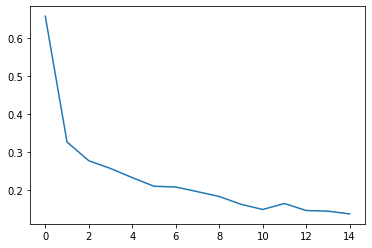

In [11]:
plt.plot(history.history['loss'])

In [12]:
loss,accuracy = evaluation

In [13]:
print("Loss: {}, Accuracy: {}".format(loss*100,accuracy*100))

Loss: 29.889807105064392, Accuracy: 91.22806787490845


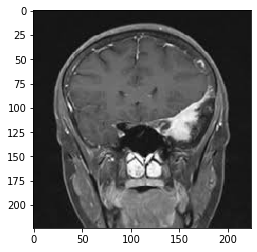

In [38]:
img_path = "DataSet\Testing\meningioma\Te-meTr_0003.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x /=  255.0
x = np.expand_dims(x, axis=0)

In [39]:
prediction = model.predict(x)


1/1 [==============================] - 0s 66ms/step


In [40]:
classes = ["Glioma","Meningioma","No Tumor","Pituitary"]
n = np.argmax(prediction)
classes[n]

'Glioma'

In [41]:
from tensorflow.keras.models import load_model
model2 = load_model('tumor.h5')

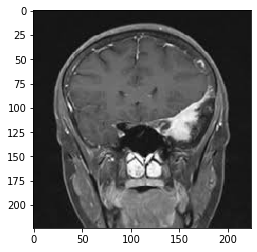

In [42]:
img_path = "DataSet\Testing\meningioma\Te-meTr_0003.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x /=  255.0
x = np.expand_dims(x, axis=0)

In [43]:
prediction = model2.predict(x)
n = np.argmax(prediction)
classes[n]


1/1 [==============================] - 2s 2s/step


'Meningioma'